In [36]:
___Author___='LumberJack Jyss'

In [37]:
print('Global Optimized LumberJack Equities Method\n°OoO_FOREX_Oo0°\nLumberJack Jyss 5779(c)')

Global Optimized LumberJack Equities Method
°OoO_FOREX_Oo0°
LumberJack Jyss 5779(c)


In [38]:
print('Importing librairies...')
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Input
from keras.layers import Dense
from yahoofinancials import YahooFinancials
print('Librairies imported')

Importing librairies...
Librairies imported


In [39]:
tf.logging.set_verbosity(tf.logging.ERROR)

In [40]:
start = '2014-01-28'
end = '2019-05-26'

In [41]:
currencies = ['GBPUSD=X']
daily_currency_prices = YahooFinancials(currencies).get_historical_price_data(start,end,'daily')

In [42]:
vix = web.DataReader('^VIX','yahoo',start,end)

In [43]:
temp_df = pd.DataFrame.from_dict(daily_currency_prices.values()).T

In [44]:
gbpusd = pd.DataFrame.from_dict(temp_df.iloc[4,0])

In [45]:
gbpusd.head()

,adjclose,close,date,formatted_date,high,low,open,volume
0,1.657495,1.657495,1390867200,2014-01-28,1.662124,1.654287,1.657523,0.0
1,1.657001,1.657001,1390953600,2014-01-29,1.660550,1.652892,1.656891,0.0
2,1.655903,1.655903,1391040000,2014-01-30,1.656589,1.644899,1.655821,0.0
3,1.649838,1.649838,1391126400,2014-01-31,1.649947,1.643169,1.649430,0.0
4,1.643791,1.643791,1391385600,2014-02-03,1.643791,1.632706,1.643791,0.0


In [46]:
df = pd.DataFrame()
df['Date'] = gbpusd['formatted_date']
df['High'] = gbpusd['high']
df['Low'] = gbpusd['low']
df['D-1'] = gbpusd['adjclose'].shift(1)
df['Close'] = gbpusd['close']
#df['Volume'] = gbpusd['volume']
df['Adj Close'] = gbpusd['adjclose']
df = df.dropna()
df.reset_index(inplace=True,drop=True)

In [47]:
delta = round(df.shape[0])
bloc1 = round(delta*0.8)
bloc2 = delta - bloc1
print("Période d'étude : ",delta)
print('Sur un découpage 80% - 20% de la période : ')
print('Bloc 1 : ',bloc1,' jours \nBloc 2 :',bloc2,' jours')

Période d'étude :  1382
Sur un découpage 80% - 20% de la période : 
Bloc 1 :  1106  jours 
Bloc 2 : 276  jours


In [48]:
date = df['Date'].iloc[50:]

In [49]:
vix = vix.iloc[:-1,:]

In [50]:
temp = pd.DataFrame()
temp = vix.iloc[:,-1]
temp.reset_index(inplace=True,drop=True)

In [51]:
dataset = df.copy()
dataset = dataset.iloc[-vix.shape[0]:,:]
dataset['Vix'] = np.array(temp)
dataset = dataset.drop(dataset[['Close','Date']],axis=1)
dataset.rename(columns={'Adj Close':'Close'}, inplace=True)
dataset.fillna(dataset.mean(), inplace=True)

In [52]:
temp = dataset.copy()
dataset = pd.DataFrame()
dataset['Date'] = date
dataset['D-1'] = temp['D-1']
dataset['Vix'] = temp['Vix'].shift(1)
dataset['Close'] = temp['Close']
dataset = dataset.dropna()
dataset.reset_index(inplace=True,drop=True)

In [53]:
# convert into input/output
X1 = dataset['D-1'].values.reshape(len(dataset),1)
X2 = dataset['Vix'].values.reshape(len(dataset),1)
y = dataset['Close'].values.reshape(len(dataset),1)

#scaler = MinMaxScaler()
#X1 = scaler.fit_transform(X1)
#X2 = scaler.fit_transform(X2)

X1_train = X1[:bloc1]
X1_test = X1[bloc1:]

X2_train = X2[:bloc1]
X2_test = X2[bloc1:]

y_train = y[:bloc1]
y_test = y[bloc1:]


In [54]:
X_train = np.concatenate((X1_train,X2_train),axis=1)
X_test = np.concatenate((X1_test,X2_test),axis=1)

In [55]:
# first input model
model = Sequential()
model.add(Dense(50, activation='relu', input_dim=2))
#model.add(Dense(30, activation='relu', input_dim=2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [56]:
# fit model
model.fit(x=X_train, y=y_train, batch_size=32, epochs=100, verbose=1,shuffle=True,validation_split=.2)

Train on 884 samples, validate on 222 samples
Epoch 1/100
884/884 [==============================] - 0s 231us/step - loss: 1.3787 - val_loss: 0.3847
Epoch 2/100
884/884 [==============================] - 0s 33us/step - loss: 0.2464 - val_loss: 0.2634
Epoch 3/100
884/884 [==============================] - 0s 32us/step - loss: 0.1821 - val_loss: 0.2173
Epoch 4/100
884/884 [==============================] - 0s 30us/step - loss: 0.1672 - val_loss: 0.2035
Epoch 5/100
884/884 [==============================] - 0s 30us/step - loss: 0.1546 - val_loss: 0.1883
Epoch 6/100
884/884 [==============================] - 0s 29us/step - loss: 0.1415 - val_loss: 0.1635
Epoch 7/100
884/884 [==============================] - 0s 29us/step - loss: 0.1266 - val_loss: 0.1496
Epoch 8/100
884/884 [==============================] - 0s 29us/step - loss: 0.1137 - val_loss: 0.1279
Epoch 9/100
884/884 [==============================] - 0s 28us/step - loss: 0.1014 - val_loss: 0.1129
Epoch 10/100
884/884 [=============

In [26]:
model.save('GBPUSDdd-1.h5')

In [57]:
# demonstrate prediction
x_input = np.array([[df.iloc[-1,5],vix.iloc[-2,5]]])
yhat = model.predict(x_input, verbose=1)
print(yhat,'versus', df.iloc[-1,-1])
error = ((df.iloc[-1,-1] - yhat)/df.iloc[-1,-1])*100
print('Error : ',abs(error[0][0]),'%')

1/1 [==============================] - 0s 27ms/step
[[1.3018225]] versus 1.2664639949798584
Error :  2.791911 %


In [58]:
print('Initializing \b Processing')
yhat = model.predict(X_test, verbose=1)
print('All processed')

Initializing Processing
226/226 [==============================] - 0s 23us/step
All processed


In [59]:
date.reset_index(inplace=True,drop=True)
resultats = date
resultats = resultats.iloc[-228:]
resultats.reset_index(inplace=True,drop=True)

In [35]:
pred = pd.DataFrame()
pred['D-1'] = dataset.iloc[1112:,1]
pred['Vix'] = dataset.iloc[1112:,2]
pred['Close'] = dataset.iloc[1112:,3]
pred['Predictions'] = yhat.reshape(226,)
pred.reset_index(inplace=True,drop=True)
resultats = pd.concat((date,pred),axis=1)
resultats = resultats.iloc[:226,:]
resultats['% Error'] = ((resultats.iloc[:,3].values-resultats.iloc[:,4])/resultats.iloc[:,4])*100

ValueError: Length of values does not match length of index

In [48]:
resultats.tail()

,Date,Open,Vix,Close,Predictions,% Error
223,2015-02-13,1.273026,15.290000,1.273156,1.273446,-0.022804
224,2015-02-16,1.272783,15.960000,1.272912,1.273206,-0.023070
225,2015-02-17,1.410239,16.309999,1.410265,1.410473,-0.014737
226,2015-02-18,1.266336,14.950000,1.266416,1.266764,-0.027469
227,2015-02-19,1.266464,14.750000,1.266464,1.266891,-0.033715


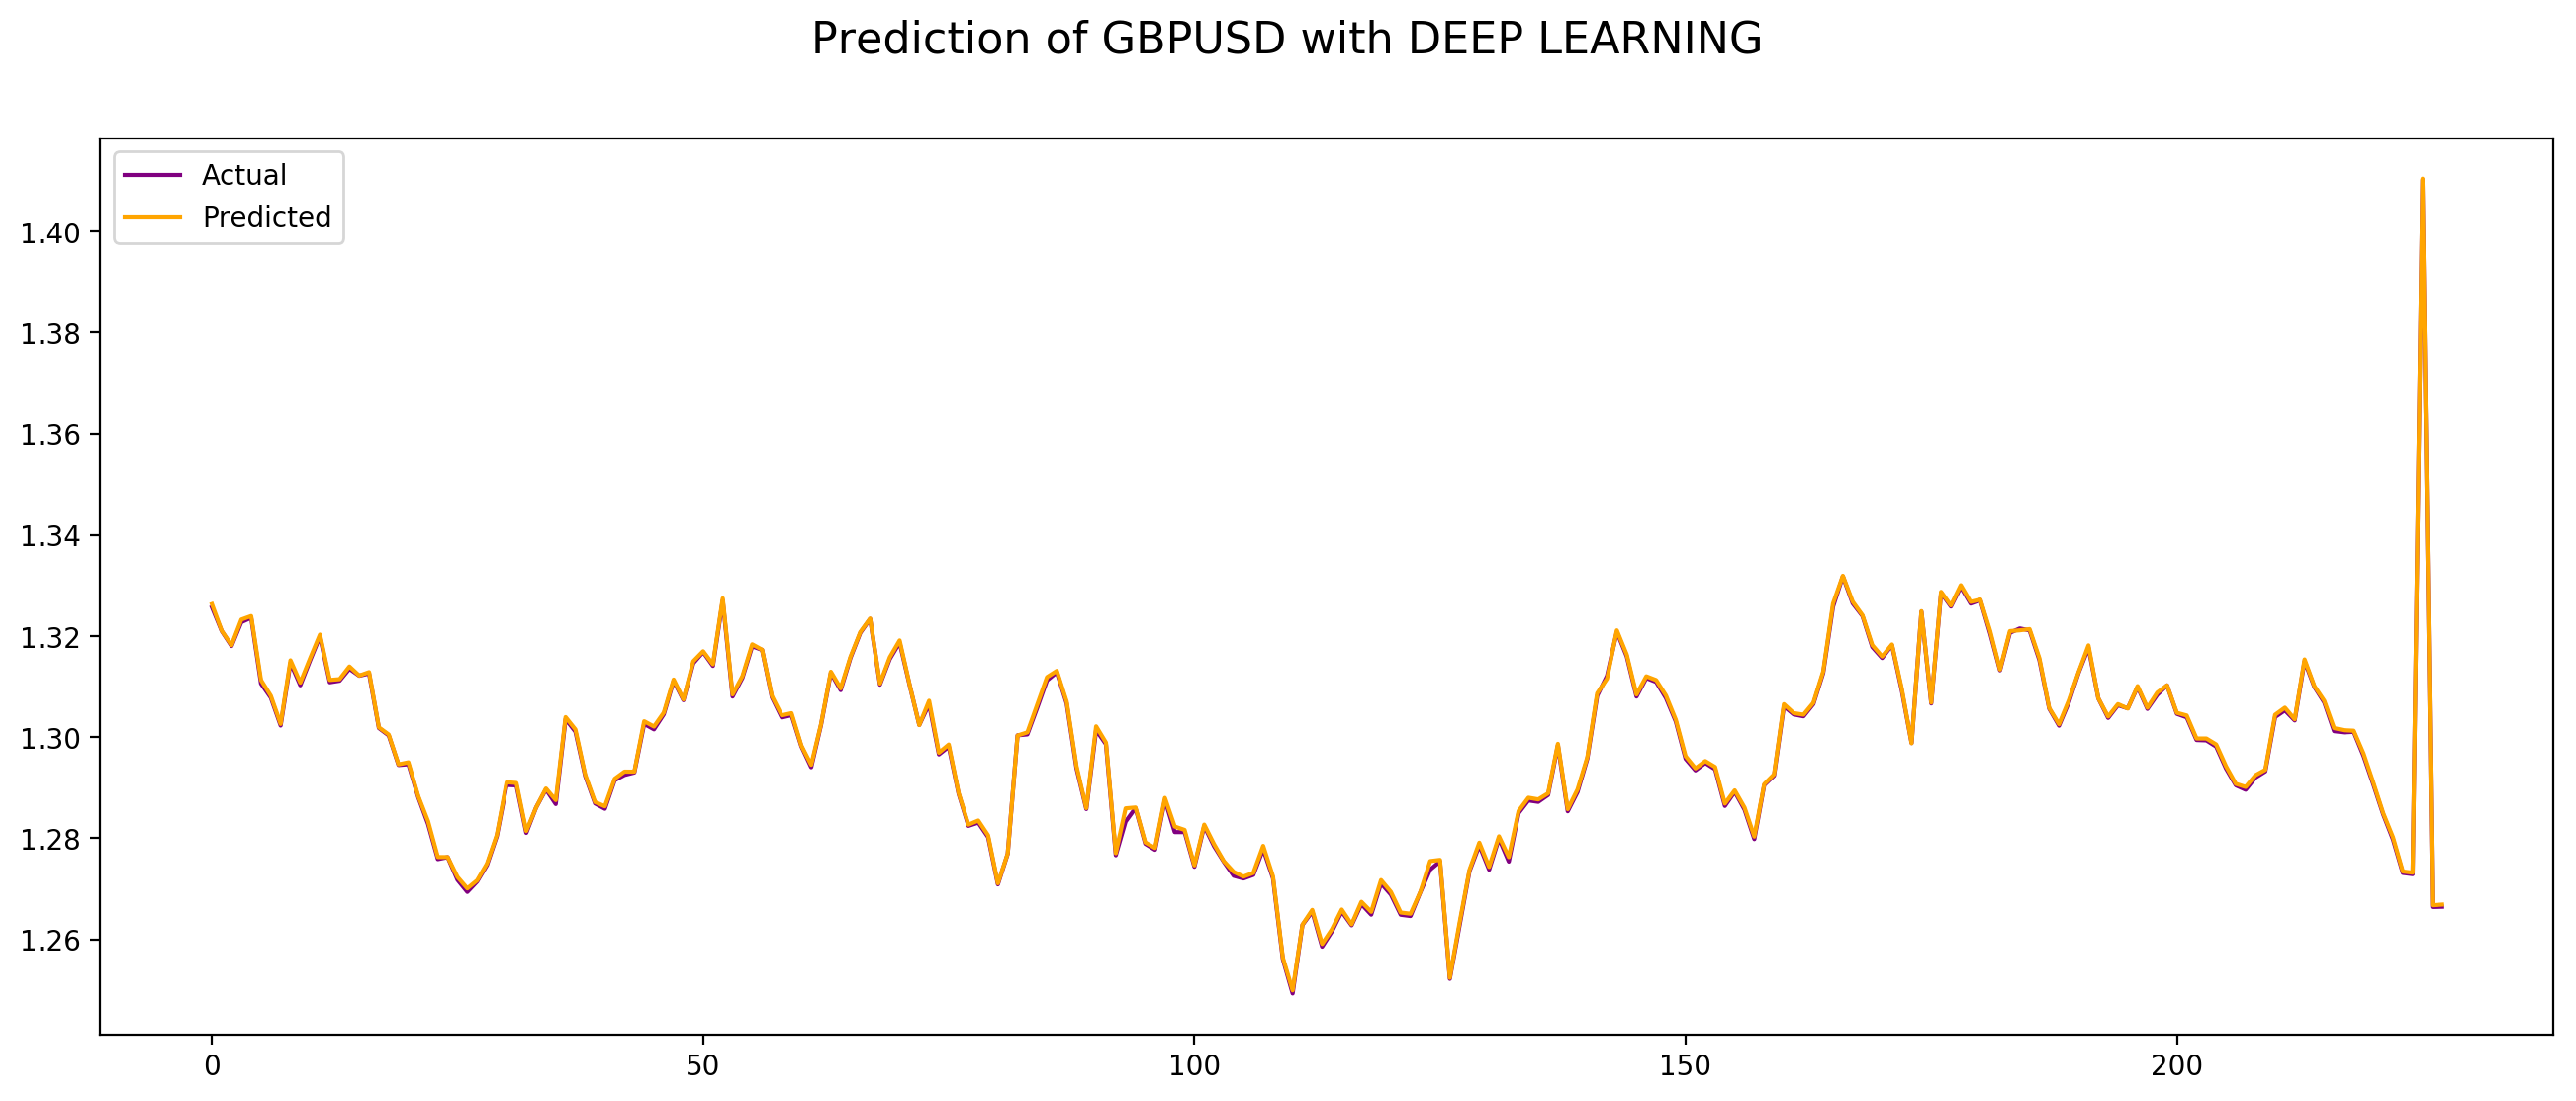

In [49]:
plt.figure(figsize=(16,6),dpi=200)
plt.suptitle('Prediction of GBPUSD with DEEP LEARNING',fontsize=16)
plt.plot(resultats['Close'],color='purple',label='Actual')
plt.plot(resultats['Predictions'],color='orange',label='Predicted')
plt.legend()
plt.show()

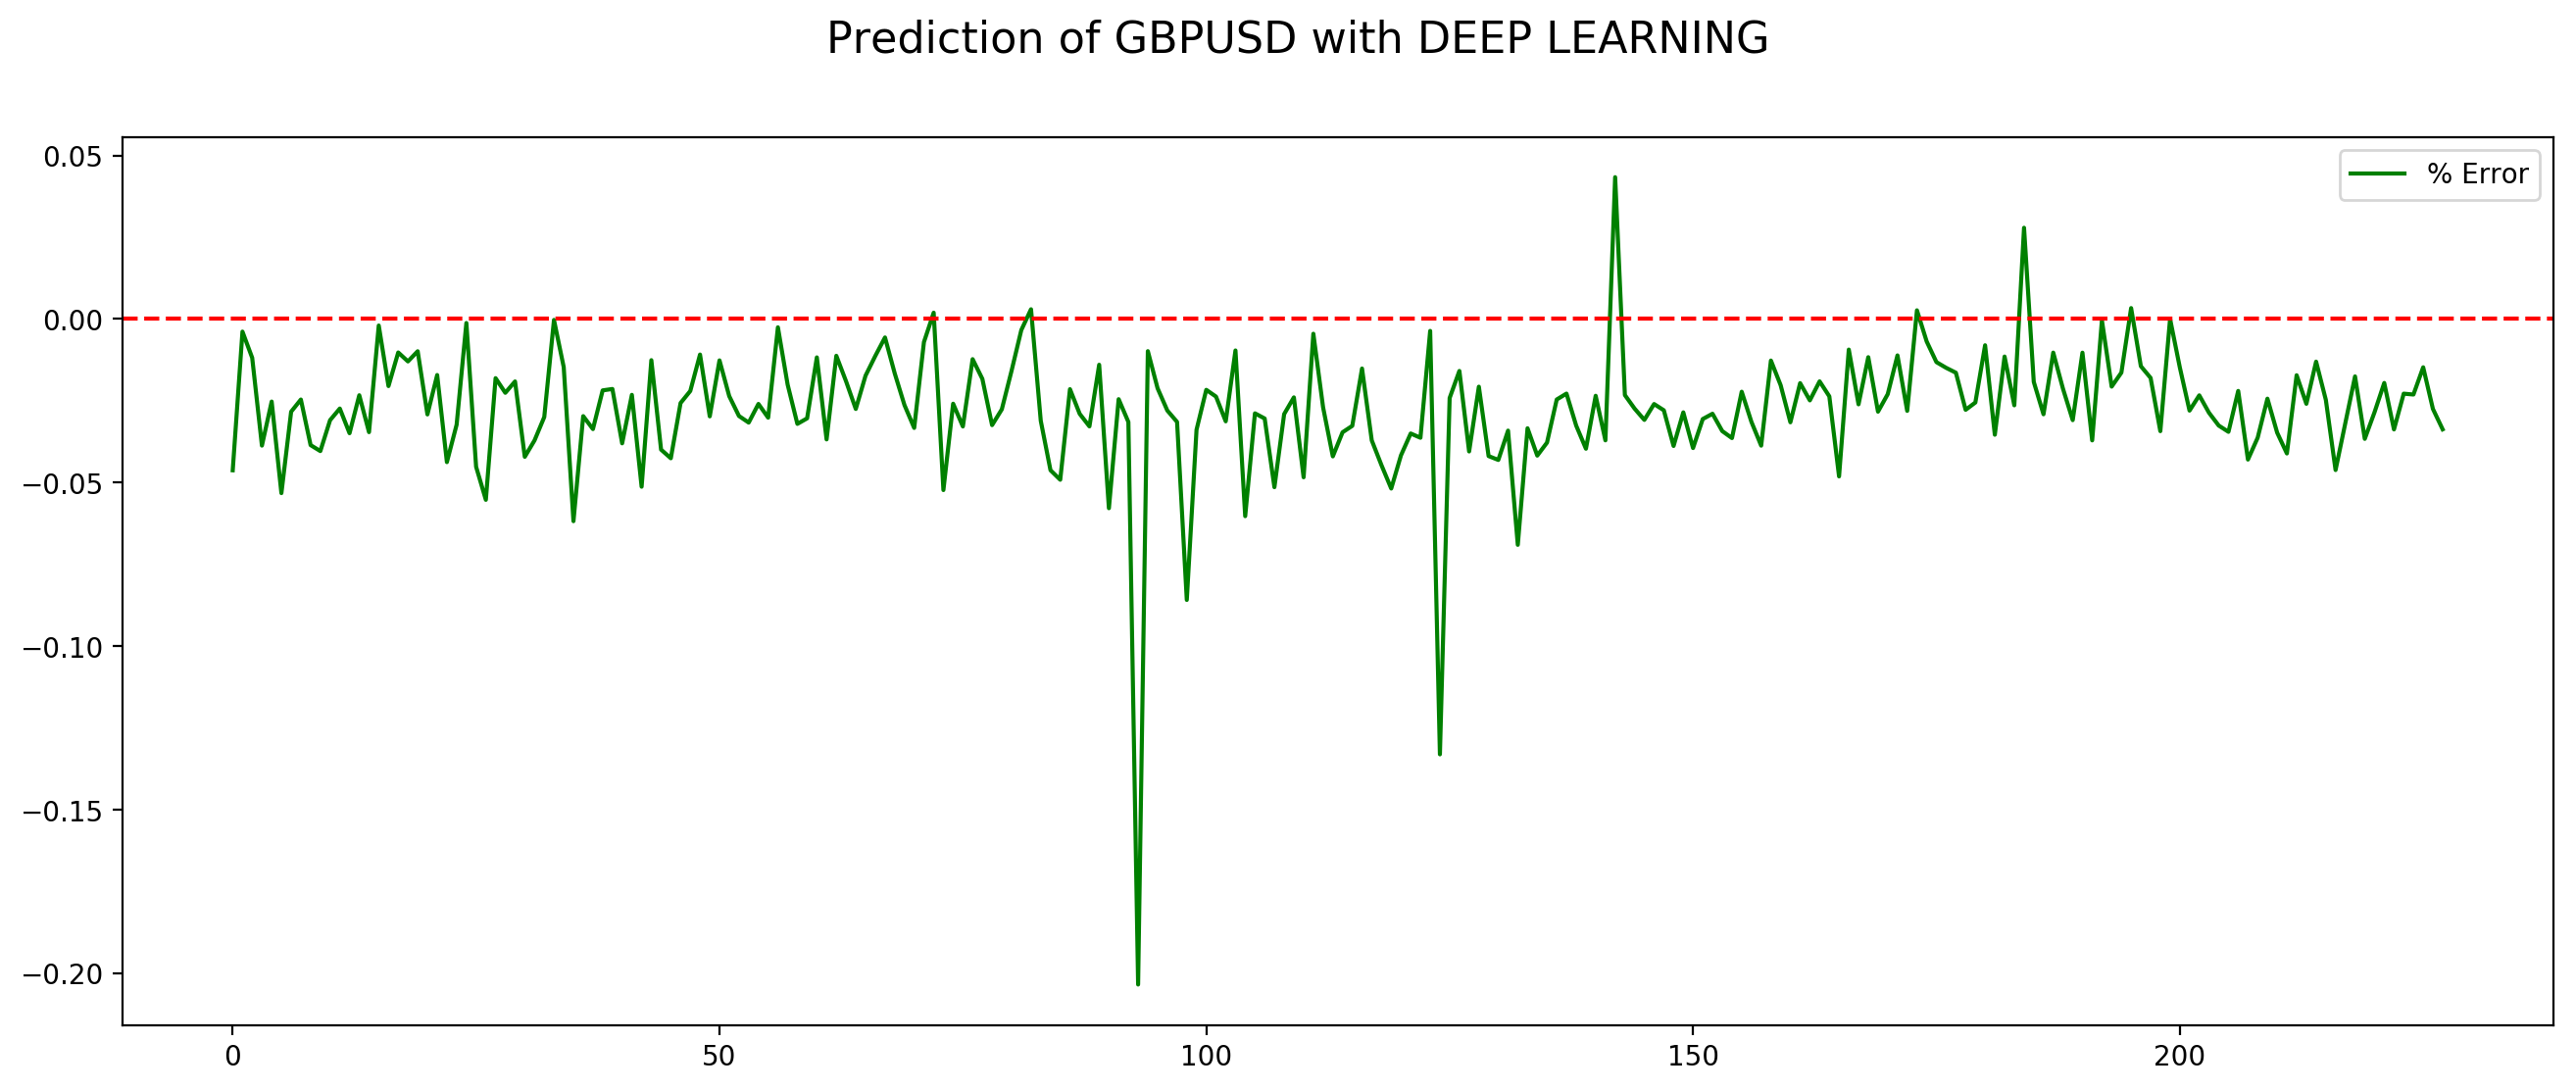

In [50]:
plt.figure(figsize=(16,6),dpi=200)
plt.suptitle('Prediction of GBPUSD with DEEP LEARNING',fontsize=16)
plt.plot(resultats['% Error'],color='g',label='% Error')
plt.axhline(y=0,linestyle='--',color='r')
plt.legend()
plt.show()